# Lab8: Text classification

In [1]:
! pip install fasttext
! pip install ktrain
! pip install shap
! pip3 install --upgrade tensorflow-gpu

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71kB 2.6MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3039078 sha256=9ed51a0474b253fb153024bf70f55147d8fd1b4aaabe2fb9e35e2c90d6d05ab9
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25.3MB 186kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 983kB 50.3MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 266kB 47.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.3MB 56.7MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

In [2]:
import fasttext
import ktrain
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.0


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_DIR = '/content/drive/MyDrive/studia/sem9/PJN'

In [6]:
tag_files = {
    'task_1': {
        'train': f'{DATA_DIR}/task_6-1/training_set_clean_only_tags.txt', 
        'test': f'{DATA_DIR}/Task6/task 01/test_set_clean_only_tags.txt',
    },
    'task_2': {
        'train': f'{DATA_DIR}/task_6-2/training_set_clean_only_tags.txt',
        'test': f'{DATA_DIR}/Task6/task 02/test_set_only_tags.txt',
    },
}

text_files = {
    'task_1': {
        'train': f'{DATA_DIR}/task_6-1/training_set_clean_only_text.txt', 
        'test': f'{DATA_DIR}/Task6/task 01/test_set_clean_only_text.txt',
    },
    'task_2': {
        'train': f'{DATA_DIR}/task_6-2/training_set_clean_only_text.txt',
        'test': f'{DATA_DIR}/Task6/task 02/test_set_only_text.txt',
    },
}

## Get acquainted with the data of the Polish Cyberbullying detection dataset. Pay special attention to the distribution of the positive and negative examples in the first task as well as distribution of the classes in the second task.

In [7]:
def read_lines(path):
    with open(path) as file:
        return file.readlines()

### Surowe dane

Dane z podanych plik√≥w zosta≈Çy wczytane i sparsowane do DataFrame'√≥w. Rozk≈Çad klas zosta≈Ç przedstawiony na histogramie.

#### Task 1

##### Train

In [8]:
task_1_train = pd.DataFrame({
    'text': [line.strip() for line in read_lines(text_files['task_1']['train'])],
    'tag': [int(line.strip()) for line in read_lines(tag_files['task_1']['train'])],
})

task_1_train.plot.hist('tag')

##### Test

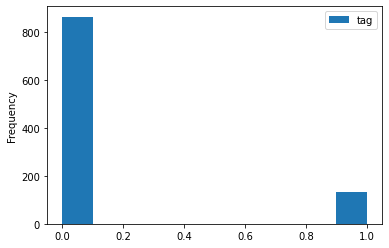

In [9]:
task_1_test = pd.DataFrame({
    'text': [line.strip() for line in read_lines(text_files['task_1']['test'])],
    'tag': [int(line.strip()) for line in read_lines(tag_files['task_1']['test'])],
})

task_1_test.plot.hist('tag')

#### Task 2

##### Train

In [10]:
task_2_train = pd.DataFrame({
    'text': [line.strip() for line in read_lines(text_files['task_2']['train'])],
    'tag': [int(line.strip()) for line in read_lines(tag_files['task_2']['train'])],
})

task_2_train.plot.hist('tag')

##### Test

In [11]:
task_2_test = pd.DataFrame({
    'text': [line.strip() for line in read_lines(text_files['task_2']['test'])],
    'tag': [int(line.strip()) for line in read_lines(tag_files['task_2']['test'])],
})

task_2_test.plot.hist('tag')

### Oversampling zbior√≥w testowych

W zwiƒÖzku z bardzo nier√≥wnomiernym rozk≈Çadem klas w zbiorze treningowym wykonany zosta≈Ç _oversampling_.




In [12]:
# inspiration: https://stackoverflow.com/a/48373329

def balance_classes(data):
    max_size = data['tag'].value_counts().max()
    data_list = [data]
    for class_index, group in data.groupby('tag'):
        data_list.append(group.sample(max_size - len(group), replace=True))
    data = pd.concat(data_list).sample(frac=1)
    data.reset_index(drop=True)
    return data

#### Task 1

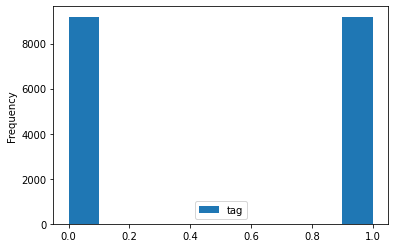

In [13]:
task_1_train = balance_classes(task_1_train)
task_1_train.plot.hist('tag')

#### Task 2

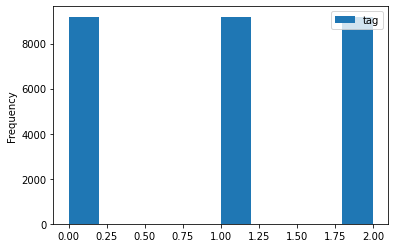

In [14]:
task_2_train = balance_classes(task_2_train)
task_2_train.plot.hist('tag')

## Train the following classifiers on the training sets (for the task 1 and the task 2):


### Bayesian classifier with TF * IDF weighting.

Do realizacji zadania wykorzystany zosta≈Ç [`Tfid Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) oraz [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) z biblioteki `scikit-learn`.

In [15]:
def fit_tfidf_classifier(train, test):    
    vectorizer = TfidfVectorizer()
    vectorizer.fit((train['text'] + test['text']).values.astype('U'))
    
    X_train = vectorizer.transform(train['text']).toarray()
    X_train = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())

    Y_train = train['tag']

    classifier = MultinomialNB()
    classifier.fit(X_train, Y_train)
    
    return vectorizer, classifier

#### Task 1

In [16]:
task_1_tfidf_vectorizer, task_1_tfidf_classifier = fit_tfidf_classifier(
    task_1_train,
    task_1_test
)

#### Task 2

In [17]:
task_2_tfidf_vectorizer, task_2_tfidf_classifier = fit_tfidf_classifier(
    task_2_train,
    task_2_test
)

### Fasttext text classifier

W pierwszej kolejno≈õci konieczne by≈Ço odpowiednie przygotowanie danych.

#### Przygotowanie danych

In [18]:
def prepare_train_data_for_fast_text(train_data, output_path):
    with open(output_path, 'w+') as file:
        for _, row in train_data.iterrows():
            label = row['tag']
            data = row['text'].replace('\n', ' ')
            file.write(f'__label__{label} {data}')
            file.write('\n')

##### Task 1

In [19]:
prepare_train_data_for_fast_text(task_1_train, f'{DATA_DIR}/fast_text_task_1_train.txt')

In [20]:
! head -n 5 $DATA_DIR/fast_text_task_1_train.txt

__label__1 Ahaha, pojebanie m√≥zgowe tego jebniƒôtego narodu \"godno≈õƒá Polak√≥w\" i 500+, zrobi≈Ço z nas szmaty
__label__1 @anonymized_account @anonymized_account Ty kurwa @anonymized_account nie pierdol w tv bo sie ≈ºygaƒá chce
__label__0 @anonymized_account @anonymized_account Nie no, nie ma üòÅ Ko≈Ñczymy, fakt.\nhttps://t.co/9PMxwN1XeV
__label__1 @anonymized_account @anonymized_account @anonymized_account Ty pieprzony k≈Çamco za pa≈Ñstwowe pieniƒÖdze.
__label__1 RT @anonymized_account @anonymized_account Twoje zachowanie i POglƒÖdy majƒÖ wiele wsp√≥lnego z komuchami.


In [21]:
print(len(task_1_train))
! wc -l $DATA_DIR/fast_text_task_1_train.txt

18380
18380 /content/drive/MyDrive/studia/sem9/PJN/fast_text_task_1_train.txt


##### Task 2

In [22]:
prepare_train_data_for_fast_text(task_2_train, f'{DATA_DIR}/fast_text_task_2_train.txt')

In [23]:
! head -n 5 $DATA_DIR/fast_text_task_2_train.txt

__label__0 @anonymized_account @anonymized_account Nic nie wiesz kobieto o Wielkiej Brytanii i nie wypowiadaj siƒô na nieznane ci tematy.
__label__0 @anonymized_account Andrew ja my≈õla≈Ç ≈ºe Ty uciekasz z nc+ bo szukasz normalno≈õci a ty uciekasz chyba bo tam normalnie by≈Ço;-)
__label__0 @anonymized_account Wiemy za to ≈ºe jest @anonymized_account parchy do parch√≥w
__label__0 @anonymized_account \"Porzucenie ulotno≈õci opi≈Çk√≥w szczƒô≈õcia\". üôà
__label__0 @anonymized_account Dobrze choƒá, ≈ºe sowite odszkodowania by≈Çy @anonymized_account


In [24]:
print(len(task_2_train))
! wc -l $DATA_DIR/fast_text_task_2_train.txt

27570
27570 /content/drive/MyDrive/studia/sem9/PJN/fast_text_task_2_train.txt


#### Tworzenie klasyfikatora

Do realizacji zadania zosta≈Ça wykorzystana biblioteka [`fastText`](https://fasttext.cc/docs/en/python-module.html).

##### Task 1

In [25]:
task_1_fast_text_classifier = fasttext.train_supervised(input=f'{DATA_DIR}/fast_text_task_1_train.txt')

##### Task 2

In [26]:
task_2_fast_text_classifier = fasttext.train_supervised(input=f'{DATA_DIR}/fast_text_task_2_train.txt')

### Transformer classifier (take into account that a number of experiments should be performed for this model).

Do realizacji zadania wykorzystana zosta≈Ça biblioteka [`ktrain`](https://github.com/amaiya/ktrain). Ze wzglƒôdu na du≈ºy czas trwania uczenia liczba epok zosta≈Ça znaczƒÖco ograniczona.

In [27]:
def fit_transformer_classifier(train, epochs, model_name='bert-base-uncased'):
    X_train, X_val, y_train, y_val = train_test_split(
        train['text'].values, 
        train['tag'].values,
        random_state=13
    )
    
    transformer = ktrain.text.Transformer(
        model_name, 
        maxlen=500,
        class_names=list(set(train['tag']))
    )
    
    preprocessed_train = transformer.preprocess_train(X_train, y_train)
    preprocessed_val = transformer.preprocess_test(X_val, y_val)
    
    classifier = transformer.get_classifier()
    learner = ktrain.get_learner(
        classifier,
        train_data=preprocessed_train,
        val_data=preprocessed_val,
        batch_size=6
    )
    learner.fit_onecycle(5e-5, epochs)
    
    return transformer, classifier, learner

#### Task 1

In [59]:
task_1_transformer = fit_transformer_classifier(task_1_train, 4)
task_1_transformer, task_1_transformer_classifier, task_1_transformer_learner = task_1_transformer

preprocessing train...
language: pl
train sequence lengths:
	mean : 13
	95percentile : 21
	99percentile : 23


Is Multi-Label? False
preprocessing test...
language: pl
test sequence lengths:
	mean : 13
	95percentile : 20
	99percentile : 23




begin training using onecycle policy with max lr of 5e-05...
Epoch 1/4
2298/2298 [==============================] - 1759s 759ms/step - loss: 0.6040 - accuracy: 0.6544 - val_loss: 0.2392 - val_accuracy: 0.9149
Epoch 2/4
2298/2298 [==============================] - 1740s 756ms/step - loss: 0.2216 - accuracy: 0.9142 - val_loss: 0.1422 - val_accuracy: 0.9469
Epoch 3/4
2298/2298 [==============================] - 1745s 758ms/step - loss: 0.1057 - accuracy: 0.9625 - val_loss: 0.0505 - val_accuracy: 0.9859
Epoch 4/4
2298/2298 [==============================] - 1743s 757ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0623 - val_accuracy: 0.9848


#### Task 2

Wykonanie uczenia dla zadania drugiego trwa≈Ço niestety bardzo d≈Çugo i prowadzi≈Ço do k≈Çopot√≥w z pamiƒôciƒÖ i kernelem.

In [20]:
task_2_transformer = fit_transformer_classifier(task_2_train, 1)
task_2_transformer, task_2_transformer_classifier, task_2_transformer_learner = task_2_transformer

preprocessing train...
language: pl
train sequence lengths:
	mean : 13
	95percentile : 20
	99percentile : 23


Is Multi-Label? False
preprocessing test...
language: pl
test sequence lengths:
	mean : 13
	95percentile : 20
	99percentile : 23




begin training using onecycle policy with max lr of 5e-05...
 125/3447 [>.............................] - ETA: 25:53:39 - loss: 1.1055 - accuracy: 0.3569

KeyboardInterrupt: ignored

## Compare the results of classification on the test set. Select the appropriate measuers (form accuracy, F1, macro/micro F1, MCC) to compare the results.

Do wyliczenia zadanych metryk ponownie wykorzystany zosta≈Ç `scikit-learn`.


In [33]:
def print_metrics(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'F1: {f1_score(y_true, y_pred, average="weighted")}')
    print(f'Macro F1: {f1_score(y_true, y_pred, average="macro")}')
    print(f'Micro F1: {f1_score(y_true, y_pred, average="micro")}')
    print(f'MCC: {matthews_corrcoef(y_true, y_pred)}')

In [34]:
def plot_confusion_matrix(y_true, y_pred, labels):
  matrix = confusion_matrix(y_true, y_pred, labels)
  ax = plt.subplot()
  sns.heatmap(matrix, annot=True, ax=ax, fmt='d', cmap='viridis')

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')

### Bayesian classifier with TF * IDF weighting.

#### Task 1

In [35]:
task_1_test_X = pd.DataFrame(
    task_1_tfidf_vectorizer.transform(task_1_test['text']).toarray(),
    columns=task_1_tfidf_vectorizer.get_feature_names()
)

task_1_test['tfidf_prediction'] = task_1_tfidf_classifier.predict(task_1_test_X)

print_metrics(task_1_test['tag'], task_1_test['tfidf_prediction'])

Accuracy: 0.804
F1: 0.8208307338511136
Macro F1: 0.6543429341346935
Micro F1: 0.804
MCC: 0.32639273484034514


In [36]:
plot_confusion_matrix(task_1_test['tag'], task_1_test['tfidf_prediction'], labels=[0, 1])

In [37]:
display(task_1_test)

text  tag  tfidf_prediction
0    @anonymized_account Spoko, jak im Duda z Moraw...    0                 0
1    @anonymized_account @anonymized_account Ale on...    0                 0
2    @anonymized_account No czy Prezes nie mia≈Ç rac...    0                 0
3    @anonymized_account @anonymized_account Przeci...    0                 0
4    @anonymized_account @anonymized_account Owszem...    0                 0
..                                                 ...  ...               ...
995  @anonymized_account Olej jak kto sie ubiera, p...    0                 0
996  @anonymized_account to oczywiste by≈Çy≈õcie dzi≈õ...    0                 0
997  @anonymized_account Duda mo≈ºe siƒô przyjƒÖƒá w bi...    0                 0
998  @anonymized_account Ty jeste≈õ jebniƒôty, t≈Ça ta...    1                 1
999  @anonymized_account @anonymized_account Ale to...    0                 1

[1000 rows x 3 columns]

#### Task 2

In [38]:
task_2_test_X = pd.DataFrame(
    task_2_tfidf_vectorizer.transform(task_2_test['text']).toarray(),
    columns=task_2_tfidf_vectorizer.get_feature_names()
)

task_2_test['tfidf_prediction'] = task_2_tfidf_classifier.predict(task_2_test_X)

print_metrics(task_2_test['tag'], task_2_test['tfidf_prediction'])

Accuracy: 0.767
F1: 0.7997753058103977
Macro F1: 0.46372375127421
Micro F1: 0.767
MCC: 0.279934378151742


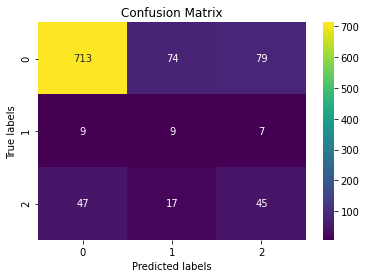

In [39]:
plot_confusion_matrix(task_2_test['tag'], task_2_test['tfidf_prediction'], labels=[0, 1, 2])

In [40]:
display(task_2_test)

text  tag  tfidf_prediction
0    @anonymized_account Spoko, jak im Duda z Moraw...    0                 0
1    @anonymized_account @anonymized_account Ale on...    0                 0
2    @anonymized_account No czy Prezes nie mia≈Ç rac...    0                 0
3    @anonymized_account @anonymized_account Przeci...    0                 0
4    @anonymized_account @anonymized_account Owszem...    0                 0
..                                                 ...  ...               ...
995  @anonymized_account Olej jak kto sie ubiera, p...    0                 0
996  @anonymized_account to oczywiste by≈Çy≈õcie dzi≈õ...    0                 2
997  @anonymized_account Duda mo≈ºe siƒô przyjƒÖƒá w bi...    0                 0
998  @anonymized_account Ty jeste≈õ jebniƒôty, t≈Ça ta...    2                 1
999  @anonymized_account @anonymized_account Ale to...    0                 1

[1000 rows x 3 columns]

### Fasttext text classifier

In [41]:
def fast_text_make_single_prediction(classifier, X):
  prediction = classifier.predict(X)
  prediction = prediction[0][0]
  prediction = prediction.replace('__label__', '')
  prediction = int(prediction)
  return prediction

In [42]:
def fast_text_make_predictions(classifier, Xs):
  predictions = [fast_text_make_single_prediction(classifier, X) for X in Xs]
  return np.array(predictions)

#### Task 1

In [43]:
task_1_test['fast_text_prediction'] = fast_text_make_predictions(
    task_1_fast_text_classifier,
    task_1_test['text']
)

print_metrics(task_1_test['tag'], task_1_test['fast_text_prediction'])

Accuracy: 0.878
F1: 0.8501704757088764
Macro F1: 0.6238236781410722
Micro F1: 0.878
MCC: 0.3163765182804967


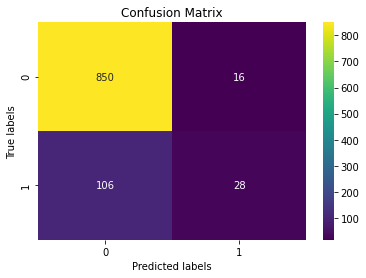

In [44]:
plot_confusion_matrix(task_1_test['tag'], task_1_test['fast_text_prediction'], labels=[0, 1])

In [45]:
display(task_1_test)

text  ...  fast_text_prediction
0    @anonymized_account Spoko, jak im Duda z Moraw...  ...                     0
1    @anonymized_account @anonymized_account Ale on...  ...                     0
2    @anonymized_account No czy Prezes nie mia≈Ç rac...  ...                     0
3    @anonymized_account @anonymized_account Przeci...  ...                     0
4    @anonymized_account @anonymized_account Owszem...  ...                     0
..                                                 ...  ...                   ...
995  @anonymized_account Olej jak kto sie ubiera, p...  ...                     0
996  @anonymized_account to oczywiste by≈Çy≈õcie dzi≈õ...  ...                     0
997  @anonymized_account Duda mo≈ºe siƒô przyjƒÖƒá w bi...  ...                     0
998  @anonymized_account Ty jeste≈õ jebniƒôty, t≈Ça ta...  ...                     0
999  @anonymized_account @anonymized_account Ale to...  ...                     0

[1000 rows x 4 columns]

#### Task 2

In [46]:
task_2_test['fast_text_prediction'] = fast_text_make_predictions(
    task_2_fast_text_classifier,
    task_2_test['text']
)

print_metrics(task_2_test['tag'], task_2_test['fast_text_prediction'])

Accuracy: 0.865
F1: 0.8279785599369602
Macro F1: 0.3985389237285353
Micro F1: 0.865
MCC: 0.20402154468330777


In [47]:
plot_confusion_matrix(task_2_test['tag'], task_2_test['fast_text_prediction'], labels=[0, 1, 2])

In [48]:
display(task_2_test)

text  ...  fast_text_prediction
0    @anonymized_account Spoko, jak im Duda z Moraw...  ...                     0
1    @anonymized_account @anonymized_account Ale on...  ...                     0
2    @anonymized_account No czy Prezes nie mia≈Ç rac...  ...                     0
3    @anonymized_account @anonymized_account Przeci...  ...                     0
4    @anonymized_account @anonymized_account Owszem...  ...                     0
..                                                 ...  ...                   ...
995  @anonymized_account Olej jak kto sie ubiera, p...  ...                     0
996  @anonymized_account to oczywiste by≈Çy≈õcie dzi≈õ...  ...                     0
997  @anonymized_account Duda mo≈ºe siƒô przyjƒÖƒá w bi...  ...                     0
998  @anonymized_account Ty jeste≈õ jebniƒôty, t≈Ça ta...  ...                     0
999  @anonymized_account @anonymized_account Ale to...  ...                     0

[1000 rows x 4 columns]

### Transformer classifier (take into account that a number of experiments should be performed for this model).

#### Task 1

In [64]:
task_1_predictor = ktrain.get_predictor(
    task_1_transformer_learner.model,
    preproc=task_1_transformer
)

task_1_test['transformer_prediction'] =  [
  task_1_predictor.predict(text)
  for text
  in task_1_test['text']
]

print_metrics(task_1_test['tag'], task_1_test['transformer_prediction'])

Accuracy: 0.888
F1: 0.8689337489011428
Macro F1: 0.6803324542475825
Micro F1: 0.888
MCC: 0.4074143351154111


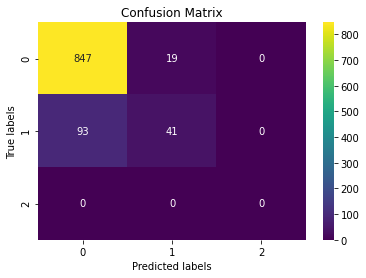

In [69]:
plot_confusion_matrix(task_1_test['tag'], task_1_test['transformer_prediction'], labels=[0, 1])

In [89]:
display(task_1_test)

text  ...  fast_text_prediction
0    @anonymized_account Spoko, jak im Duda z Moraw...  ...                     0
1    @anonymized_account @anonymized_account Ale on...  ...                     0
2    @anonymized_account No czy Prezes nie mia≈Ç rac...  ...                     0
3    @anonymized_account @anonymized_account Przeci...  ...                     0
4    @anonymized_account @anonymized_account Owszem...  ...                     0
..                                                 ...  ...                   ...
995  @anonymized_account Olej jak kto sie ubiera, p...  ...                     0
996  @anonymized_account to oczywiste by≈Çy≈õcie dzi≈õ...  ...                     0
997  @anonymized_account Duda mo≈ºe siƒô przyjƒÖƒá w bi...  ...                     0
998  @anonymized_account Ty jeste≈õ jebniƒôty, t≈Ça ta...  ...                     0
999  @anonymized_account @anonymized_account Ale to...  ...                     0

[1000 rows x 5 columns]

#### Task 2

Niestety nie uda≈Ço mi siƒô zrealizowaƒá tej czƒô≈õci zadania ze wzglƒôdu na zbyt d≈Çugi czas trwania uczenia.

In [ ]:
task_2_predictor = ktrain.get_predictor(
    task_2_transformer_learner.model,
    preproc=task_2_transformer
)

task_2_test['transformer_prediction'] =  [
  task_2_predictor.predict(text)
  for text
  in task_2_test['text']
]

print_metrics(task_2_test['tag'], task_2_test['transformer_prediction'])

In [ ]:
plot_confusion_matrix(task_2_test['tag'], task_2_test['transformer_prediction'], labels=[0, 1, 2])

In [ ]:
display(task_2_test)

## Select 1 TP, 1 TN, 1 FP and 1 FN from your predictions (for the best classifier) and compare the decisions of each classifier on these examples using SHAP.


Outputy SHAP-a mo≈ºna znale≈∫ƒá na [Colabie](https://colab.research.google.com/drive/1aXgz0-RsUiFoxjKZG1j9740Y40V2pUk9?usp=sharing).

Wybrane zosta≈Çy elementy zbioru testowego spe≈ÇniajƒÖce zadane warunki dla klasyfikatora transformer, kt√≥ry sprawdzi≈Ç siƒô najlepiej. Niestety por√≥wnanie tego klasyfikatora nie zosta≈Ço uwzglƒôdnione w tym punkcie, ze wzglƒôdu na kt√≥rƒÖ≈õ z kolei ≈õmierƒá kernela.

In [71]:
best_classifier = 'transformer_prediction'

tp = task_1_test[task_1_test['tag'] == 1][task_1_test[best_classifier] == 1]['text'].iloc[:1].values
fp = task_1_test[task_1_test['tag'] == 0][task_1_test[best_classifier] == 1]['text'].iloc[:1].values
tn = task_1_test[task_1_test['tag'] == 0][task_1_test[best_classifier] == 0]['text'].iloc[:1].values
fn = task_1_test[task_1_test['tag'] == 1][task_1_test[best_classifier] == 0]['text'].iloc[:1].values

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


In [75]:
print(f'TP: "{tp[0]}"')
print(f'FP: "{fp[0]}"')
print(f'TN: "{tn[0]}"')
print(f'FN: "{fn[0]}"')

TP: "@anonymized_account Dok≈Çadnie, pisdzielstwo nie ma prawa rozpierdalaƒá systemu,  sƒÖdownictwa nie majƒÖc wiƒôkszo≈õci"
FP: "@anonymized_account @anonymized_account Kto mieczem wojuje, ten od pochwy ginie"
TN: "@anonymized_account Spoko, jak im Duda z Morawieckim zam√≥wiƒÖ po piƒôƒá piw to wszystko bƒôdzie ok."
FN: "@anonymized_account Tej szmaty siƒô nie komentuje"


#### True positive

> @anonymized_account Dok≈Çadnie, pisdzielstwo nie ma prawa rozpierdalaƒá systemu,  sƒÖdownictwa nie majƒÖc wiƒôkszo≈õci

##### Bayesian classifier with TF * IDF weighting.

In [48]:
shap.initjs()

task_1_train_X = pd.DataFrame(
    task_1_tfidf_vectorizer.transform(task_1_train['text']).toarray(),
    columns=task_1_tfidf_vectorizer.get_feature_names()
)

task1_tfidf_explainer = shap.KernelExplainer(
    task_1_tfidf_classifier.predict, 
    task_1_train_X[:25]
)

task_1_tp = pd.DataFrame(
    task_1_tfidf_vectorizer.transform(tp).toarray(),
    columns=task_1_tfidf_vectorizer.get_feature_names()
)

shap_values = task1_tfidf_explainer.shap_values(task_1_tp)
shap.force_plot(task1_tfidf_explainer.expected_value, shap_values, task_1_tp)

##### Fasttext text classifier

In [62]:
shap.initjs()

task1_fast_text_explainer = shap.KernelExplainer(
    lambda Xs: np.array([fast_text_make_single_prediction(task_1_fast_text_classifier, X[0]) for X in Xs]), 
    task_1_train['text'].values.reshape((18380, 1))[:25]
)

shap_values = task1_fast_text_explainer.shap_values(tp)
shap.force_plot(task1_fast_text_explainer.expected_value, shap_values, tp)

#### False positive

> @anonymized_account @anonymized_account Kto mieczem wojuje, ten od pochwy ginie

##### Bayesian classifier with TF * IDF weighting.

In [49]:
shap.initjs()

task_1_fp = pd.DataFrame(
    task_1_tfidf_vectorizer.transform(fp).toarray(),
    columns=task_1_tfidf_vectorizer.get_feature_names()
)

shap_values = task1_tfidf_explainer.shap_values(task_1_fp)
shap.force_plot(task1_tfidf_explainer.expected_value, shap_values, task_1_fp)

##### Fasttext text classifier

In [63]:
shap.initjs()

shap_values = task1_fast_text_explainer.shap_values(fp)
shap.force_plot(task1_fast_text_explainer.expected_value, shap_values, fp)

#### True negative

> @anonymized_account Spoko, jak im Duda z Morawieckim zam√≥wiƒÖ po piƒôƒá piw to wszystko bƒôdzie ok.

##### Bayesian classifier with TF * IDF weighting.

In [60]:
shap.initjs()

task_1_tn = pd.DataFrame(
    task_1_tfidf_vectorizer.transform(tn).toarray(),
    columns=task_1_tfidf_vectorizer.get_feature_names()
)

shap_values = task1_tfidf_explainer.shap_values(task_1_tn)
shap.force_plot(task1_tfidf_explainer.expected_value, shap_values, task_1_tn)

##### Fasttext text classifier

In [64]:
shap.initjs()

shap_values = task1_fast_text_explainer.shap_values(tn)
shap.force_plot(task1_fast_text_explainer.expected_value, shap_values, tn)

#### False negative

> @anonymized_account Tej szmaty siƒô nie komentuje

##### Bayesian classifier with TF * IDF weighting.

In [65]:
shap.initjs()

task_1_fn = pd.DataFrame(
    task_1_tfidf_vectorizer.transform(fn).toarray(),
    columns=task_1_tfidf_vectorizer.get_feature_names()
)

shap_values = task1_tfidf_explainer.shap_values(task_1_fn)
shap.force_plot(task1_tfidf_explainer.expected_value, shap_values, task_1_fn)

##### Fasttext text classifier

In [66]:
shap.initjs()

shap_values = task1_fast_text_explainer.shap_values(fn)
shap.force_plot(task1_fast_text_explainer.expected_value, shap_values, fn)

### Task 2

Nie uda≈Ço mi siƒô niestety zrealizowaƒá tego podpunktu dla Taska 2.

## Podsumowanie wynik√≥w

W poni≈ºszych tabelach przygotowane zosta≈Ço zestawienie wynik√≥w przetestowanych klasyfikator√≥w w por√≥wnaniu z wynikami raportowanymi przez PolEval.

### Task 1

| metoda | accuracy | F1 |
|-|-|-|
|TF-IDF | 81,80 | 83,34 |
|fastText | 87,80 | 84,92 |
|transformer | 88,80 | 86,89 |
|n-waves ULMFiT (PolEval) | 90,10| 58.58 |
|fastText (PolEval) | 87.80 |  41.35 	|

### Task 2

| metoda | micro F1 | macro F1 |
|-|-|-|
|TF-IDF | 76,90 | 46,49 |
|fastText | 86,60 | 40,69 | 
|transformer | ? | ? |
|model1-svm (PolEval) | 87,60 | 51,75 |
|fastText (PolEval) | 86,80 |	47,22	|


## Answer the following questions:

### Which of the classifiers works the best for the task 1 and the task 2.


Wed≈Çug strony PolEval dla zadania pierwszego najistotniejszƒÖ metrykƒÖ jest F1, a w drugiej kolejno≈õci accuracy. IdƒÖc tym tropem, dla zadania 1 ranking prezentuje siƒô nastƒôpujƒÖco:
 1. Klasyfikator transformer,
 2. fastText,
 3. TF-IDF.

Wyniki F1 dla TF-IDS i fastText by≈Çy wzglƒôdnie blisko, ale TF-IDF bardziej odstawa≈Ço pod wzglƒôdem accuracy.


W zadaniu drugim nale≈ºy zwr√≥ciƒá najwiƒôkszƒÖ uwagƒô na micro i macro F1. Wyb√≥r miƒôszy fastText i TF-IDF jest zatem dosyƒá trudny, poniewa≈º ka≈ºde poradzi≈Ço sobie lepiej w oczach innej metryki. Przewaga fastText jest jednak na tyle du≈ºa w micro F1, ≈ºe uzna≈Çabym go za zwyciƒôzcƒô w tej kategorii.


### Did you achieve results comparable with the results of [PolEval Task](http://2019.poleval.pl/index.php/results/)?

Por√≥wnanie z wynikami PolEval widoczne jest w powy≈ºszych tabelach. 

W zadaniu pierwszym uda≈Ço mi siƒô uzyskaƒá dosyƒá por√≥wnywalny wynik accuracy, jednak wynik metryki F1 wyszed≈Ç mi du≈ºo lepszy od wyniku zwyciƒôzcy (nawet w przypadku TF-IDF, czyli najs≈Çabszego klasyfikatora).

W opisie tego zadania na stronie PolEval znalaz≈Çam nastƒôpujƒÖcƒÖ sugestiƒô odno≈õnie ewaluacji wynik√≥w:

> In evaluation one should look primarily at the balanced F-score, with Accuracy as a supporting measure. Furthermore, it is good to keep your scores as close as possible to BEP (break-even-point of Precision and Recall),

zatem przed deklaracjƒÖ zwyciƒôstwa byƒá mo≈ºe warto by by≈Ço zerknƒÖƒá r√≥wnie≈º na precision i recall.

W zadaniu drugim wyniki pokrywajƒÖ siƒô ca≈Çkiem nie≈∫le z wynikami PolEval i ≈ºadna z metryk wynik√≥w nie przekracza rekordowych warto≈õci.

### Did you achieve results comparabie with the [Klej leaderboard](https://klejbenchmark.com/leaderboard/)?

Z [artyku≈Çu](https://arxiv.org/pdf/2005.00630.pdf) zalinkowanego na stronie KLEJ-u wywnioskowa≈Çam, ≈ºe zadanie CBD w rankingu to najprawdopodobniej znany nam Task 1, a warto≈õƒá podanej metryki to F1.

Najwy≈ºszy wynik przedstawiony na stronie KLEJ-u to 72,40, co jest warto≈õciƒÖ znaczƒÖco lepszƒÖ od wynik√≥w raportowanych na stronie PolEval. Tym samym pozornie nadal jest to wynik s≈Çabszy od uzyskanego w czasie realizacji zadania, przy czym jak wspomia≈Çam w poprzednim podpunkcie, podchodzƒô nieco sceptycznie do swoich rezultat√≥w. Wydaje mi siƒô, ≈ºe por√≥wnanie tych rezultat√≥w by≈Çoby ≈Çatwiejsze, gdyby przedstawione by≈Ço wiƒôcej metryk takich jak sugerowane przez autor√≥w zadania accuracy, precision i recall.

Ponadto, je≈õli dobrze rozumiem, modele przedstawione na stronie KLEJ-u radzƒÖ sobie dobrze nie tylko z zadaniem CBD, ale r√≥wnie≈º z wieloma innymi. CBD wydaje siƒô tak naprawdƒô jednƒÖ z ich s≈Çabszych stron, zatem por√≥wnanie ich z moimi naiwnymi pr√≥bami mo≈ºe nie byƒá do ko≈Ñca uczciwe.

### Describe strengths and weaknesses of each of the compared algorithms.
Naj≈Çatwiejszy do zrozumienia i implementacji jest klasyfikator bayesowski, jednak r√≥wnocze≈õnie ma on najs≈Çabsze wyniki. Jest nazywany naiwnym, poniewa≈º uznaje ka≈ºdƒÖ z cech obiektu za byt niezale≈ºny, jednak pomimo tych uproszcze≈Ñ wcale nie radzi sobie tak ≈∫le w praktyce. Od strony technicznej najtrudniejszy w wykorzystaniu by≈Ç FastText wraz ze swoim specyficznym API, jednak jego dzia≈Çanie okaza≈Ço siƒô ca≈Çkiem szybkie, a wyniki zadowalajƒÖce. Klasyfikator transformer potrzebowa≈Ç zdecydowanie najwiƒôcej czasu na trening (mimo u≈ºycia Google Colaboratory z GPU) i kilkukrotnie doprowadzi≈Ç do ≈õmierci kernela i utraty innych wynik√≥w. Aby wykorzystaƒá w pe≈Çni jego mo≈ºliwo≈õci konieczne by≈Çoby dobranie odpowiednich parametr√≥w (sta≈Ça uczƒÖca, rozmiar batchy i tak dalej).

### Do you think comparison of raw performance values on a single task is enough to assess the value of a given algorithm/model?
Wydaje mi siƒô, ≈ºe nie, ale dla specjalisty lub specjalistki byƒá mo≈ºe by≈Çaby to wystarczajƒÖca informacja. Sprawƒô na pewno utrudnia fakt, ≈ºe dla r√≥≈ºnych zada≈Ñ sugerowane sƒÖ r√≥≈ºne metryki, a ranking bardzo siƒô r√≥≈ºni w zale≈ºno≈õci od wybranego parametru. Dodatkowo, jak mo≈ºna by≈Ço zauwa≈ºyƒá w rankingu KLEJ, r√≥≈ºne modele radzƒÖ sobie r√≥≈ºnie z poszczeg√≥lnymi zadaniami, wiƒôc wynik danego modelu w ramach konkretnego zadania nie musi rzutowaƒá na jego og√≥lnƒÖ skuteczno≈õƒá.

### Did SHAP show that the models use valuable featurs/words when performing their decision?
W analizie TF-IDS faktycznie mo≈ºna zauwa≈ºyƒá, jak poszczeg√≥lne s≈Çowa wyciƒÖgajƒÖ odpowied≈∫ w danym kierunku -- przyk≈Çadowo "pisdzielstwo", "duda" i "szmata" kierujƒÖ wynik w stronƒô mowy nienawi≈õci, a "ok" i "morawiecki" w kierunku przeciwnym. W przypadku FastTextu nie mia≈Çam pewno≈õci, jak mogƒô uzyskaƒá analogiczny efekt.